In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import GRU, Bidirectional, Dropout, Input, TimeDistributed, BatchNormalization, Dense, Conv1D, Activation, UpSampling1D
from keras.models import Model
from keras.optimizers import Adam
from livelossplot import PlotLossesKeras
import IPython.display as ipd

Using TensorFlow backend.


In [2]:
def build_model(input_shape):
    X_input = Input(shape=input_shape)
    X = Conv1D(196, kernel_size=1, strides=1)(X_input)
    X = Dropout(0.2)(X)
    X = BatchNormalization()(X)
    X = Activation("relu")(X)
    X = Bidirectional(GRU(units = 256, return_sequences = True, recurrent_dropout=0.2))(X)
    X = BatchNormalization()(X)
    X = UpSampling1D(5)(X)
    X = Dropout(0.5)(X)
    X_output = TimeDistributed(Dense(1, activation = "sigmoid"))(X)
    
    return Model(inputs=X_input, outputs=X_output)

In [3]:
model = build_model((1000,50))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
model.load_weights("Checkpoints/final_weights/seg_gru_v11_0.65_0.92.hdf5")

In [5]:
data = pd.read_pickle("../../Data/Guitar/File_onset_data_final.pkl").reset_index(drop=True)

In [29]:
index = np.random.choice(np.arange(data.shape[0]))

In [30]:
X = data.loc[index, "xf"].reshape(1, 1000, 50)
y = data.loc[index, "y"]

In [31]:
pred = model.predict(X)

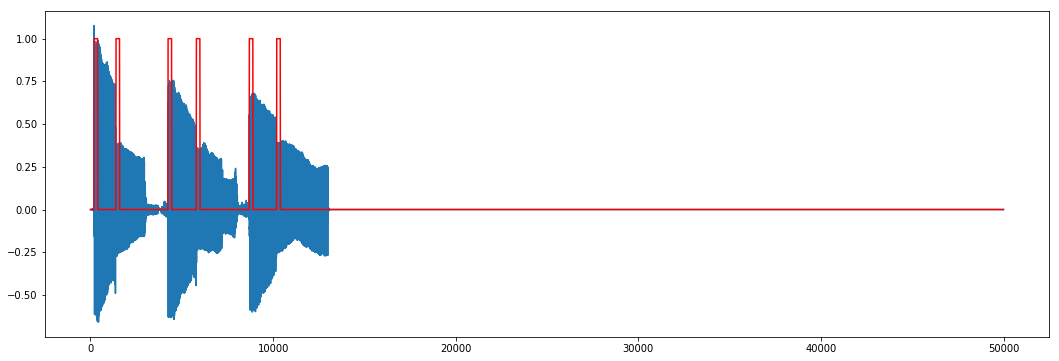

In [32]:
plt.figure(figsize=(18,6))
plt.plot(data.loc[index, "x"]*3)
plt.plot(np.arange(0, 50000, 10), y, "r")

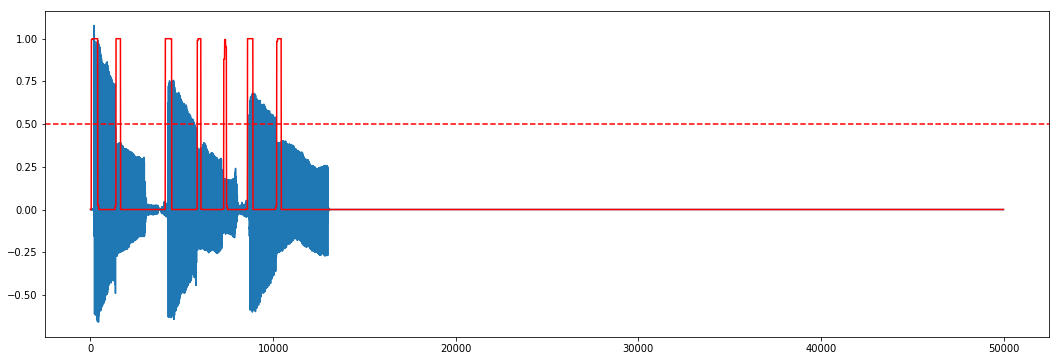

In [33]:
plt.figure(figsize=(18,6))
plt.plot(3*data.loc[index, "x"])
plt.plot(np.arange(0, 50000, 10), pred[0], "r")
plt.axhline(0.5, color="r", linestyle="--")